# Figure 3. The position and strenght of TPD-43 binding, along with intrinsic polyA site strength, influence TDP-43 regulated APA

## Load libraries and functions

In [1]:
shhh <- suppressPackageStartupMessages
shhh(library(data.table))
shhh(library(stringr))
shhh(library(ggplot2))
shhh(library("GenomicRanges"))
library("viridis") 
library(patchwork)
library(ggrastr)
library(ggridges)
shhh(library(BSgenome.Hsapiens.UCSC.hg38))
Hs=BSgenome.Hsapiens.UCSC.hg38

Loading required package: viridisLite



In [2]:
library('Cairo')
CairoFonts(
regular="Sans:style=Light",
bold="Sans:style=Bold",
italic="Sans:style=Oblique",
bolditalic="Sans:style=BoldOblique"
)
options(repr.plot.width=12, repr.plot.height=8)

## Figure 3a. distance from TDP-43 to APA sites

In [3]:
apa_tdp43_dist = fread("Fig_3a_3c_apa-to-tdp43-ref-distance.csv")

In [4]:
apa_tdp43_dist$delta_usage_bin = factor(apa_tdp43_dist$delta_usage_bin, levels = c("2_decrease", "1_increase"))

In [5]:
apa_tdp43_dist_us = apa_tdp43_dist[delta_usage_bin != "n"][closest < 0]
apa_tdp43_dist_ds = apa_tdp43_dist[delta_usage_bin != "n"][closest > 0]

### Test whether the distribution follows a normal distribution

In [6]:
shapiro.test(apa_tdp43_dist_us[delta_usage_bin == "2_decrease", closest])


	Shapiro-Wilk normality test

data:  apa_tdp43_dist_us[delta_usage_bin == "2_decrease", closest]
W = 0.81689, p-value < 2.2e-16


In [7]:
shapiro.test(apa_tdp43_dist_us[delta_usage_bin == "2_decrease", closest])


	Shapiro-Wilk normality test

data:  apa_tdp43_dist_us[delta_usage_bin == "2_decrease", closest]
W = 0.81689, p-value < 2.2e-16


In [8]:
shapiro.test(apa_tdp43_dist_us[delta_usage_bin == "1_increase", closest])


	Shapiro-Wilk normality test

data:  apa_tdp43_dist_us[delta_usage_bin == "1_increase", closest]
W = 0.83783, p-value < 2.2e-16


### stastical test for non-normally distributed datasets

In [9]:
wilcox.test(apa_tdp43_dist_us[delta_usage_bin == "2_decrease", closest],
            apa_tdp43_dist_us[delta_usage_bin == "1_increase", closest])


	Wilcoxon rank sum test with continuity correction

data:  apa_tdp43_dist_us[delta_usage_bin == "2_decrease", closest] and apa_tdp43_dist_us[delta_usage_bin == "1_increase", closest]
W = 396872, p-value = 0.04063
alternative hypothesis: true location shift is not equal to 0


In [10]:
wilcox.test(apa_tdp43_dist_ds[delta_usage_bin == "2_decrease", closest], 
            apa_tdp43_dist_ds[delta_usage_bin == "1_increase", closest])


	Wilcoxon rank sum test with continuity correction

data:  apa_tdp43_dist_ds[delta_usage_bin == "2_decrease", closest] and apa_tdp43_dist_ds[delta_usage_bin == "1_increase", closest]
W = 256978, p-value = 2.252e-09
alternative hypothesis: true location shift is greater than 0


In [11]:
apa_tdp43_dist_us_plot = 
    ggplot(apa_tdp43_dist_us, aes(closest, color = delta_usage_bin)) + 
        stat_ecdf() + 
        scale_x_continuous(name = "Upstream of polyA sites (nt)", breaks = seq(-400, 0, 200)) +
        scale_y_continuous(name = "Cumulative fraction") +
        theme_classic(base_size = 6) + 
        scale_color_discrete(name = "Usage change\n upon TDP-43 KD",
                             labels = c("Down", "Up")) +
     theme(legend.position = c(0.3, 0.8), 
          legend.background = element_blank(),
          legend.title = element_text(size = 5), 
          legend.text = element_text(size = 5), 
          legend.key.width = unit(0.1, "in"), 
          legend.key.size = unit(0.01, "in"))

Warning message:
“A numeric `legend.position` argument in `theme()` was deprecated in ggplot2
3.5.0.
ℹ Please use the `legend.position.inside` argument of `theme()` instead.”


In [12]:
apa_tdp43_dist_ds_plot = ggplot(apa_tdp43_dist_ds, aes(closest, color = delta_usage_bin)) + 
    stat_ecdf() +  #, show.legend = F
    scale_x_continuous(name = "Upstream of polyA sites (nt)", , limits = c(0, 600), breaks = seq(0, 400, 200)) +
    scale_y_continuous(name = NULL, labels = NULL) +
        scale_color_discrete(name = "Usage change\n upon TDP-43 KD",
                             labels = c("Down", "Up")) +
    theme_classic(base_size = 6) +
    theme(legend.position = c(0.3, 0.8), 
          legend.background = element_blank(),
          legend.title = element_text(size = 5), 
          legend.text = element_text(size = 5), 
          legend.key.width = unit(0.1, "in"), 
          legend.key.size = unit(0.01, "in"))

In [13]:
apa_tdp43_dist_plot = apa_tdp43_dist_us_plot + apa_tdp43_dist_ds_plot

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_ecdf()`).”


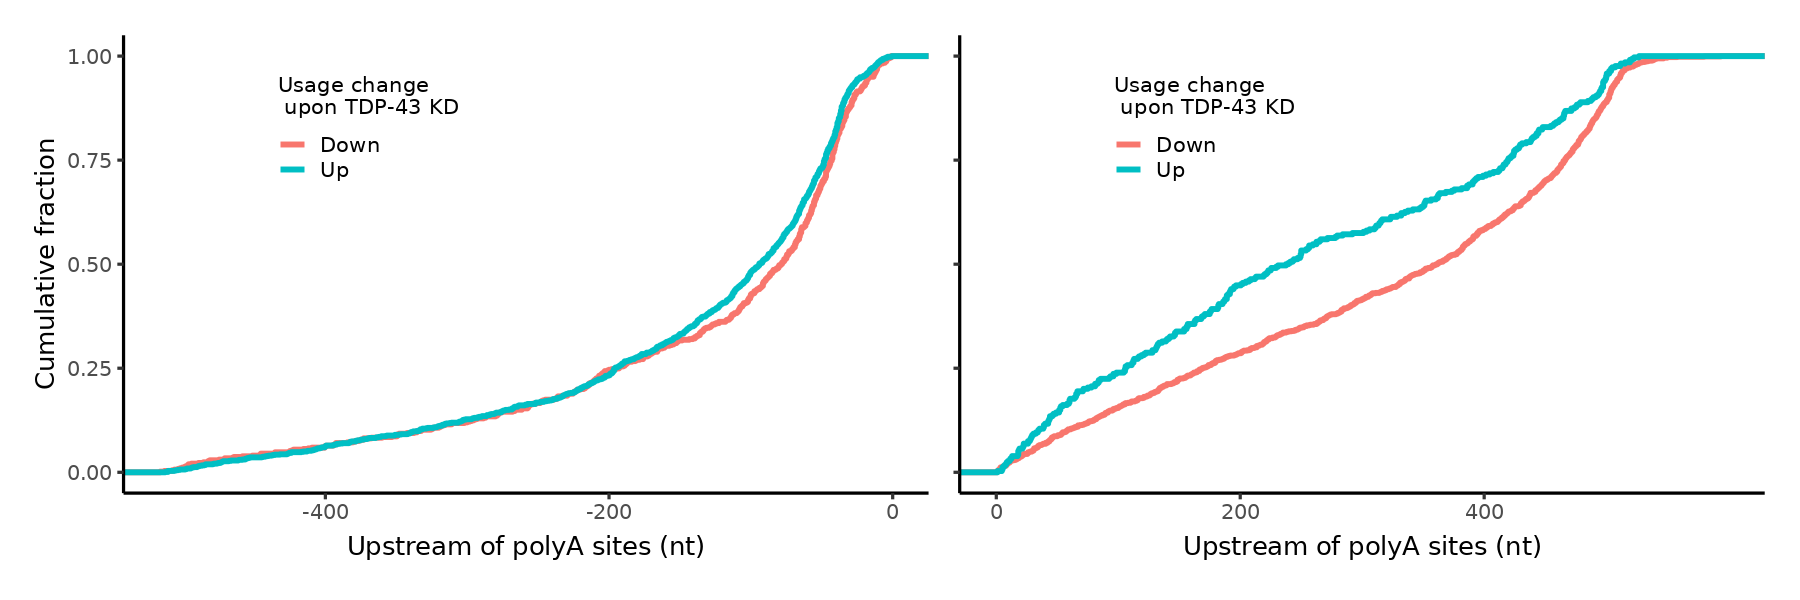

In [14]:
options(repr.plot.width=6, repr.plot.height=2, repr.plot.res = 300, repr.plot.units = "in")

apa_tdp43_dist_plot

In [15]:
ggsave(apa_tdp43_dist_plot, file = "fig_3a_apa_tdp43_dist_plot.pdf", width = 3, height = 2, units = "in", dpi = 300)
## reformatted in illustrator

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_ecdf()`).”


## Figure. 3b

> see file: analysis-visualization_Figure_2h.ipynb

## Figure. 3c

In [16]:
abs_delta_usage_vs_gt = apa_tdp43_dist[closest > 0][delta_usage_bin %in% c("1_increase", "2_decrease")]
abs_delta_usage_vs_gt[, GT_bin := dplyr::ntile(xlinksite_GT_content, 4)]
abs_delta_usage_vs_gt[, abs_delta_usage := abs(delta_usage)]

### Test whether the distribution follows a normal distribution

In [17]:
shapiro.test(abs_delta_usage_vs_gt[GT_bin == 1, abs_delta_usage])
shapiro.test(abs_delta_usage_vs_gt[GT_bin == 4, abs_delta_usage])


	Shapiro-Wilk normality test

data:  abs_delta_usage_vs_gt[GT_bin == 1, abs_delta_usage]
W = 0.86413, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  abs_delta_usage_vs_gt[GT_bin == 4, abs_delta_usage]
W = 0.79973, p-value < 2.2e-16


In [18]:
wilcox.test(abs_delta_usage_vs_gt[GT_bin == 1, abs_delta_usage], 
            abs_delta_usage_vs_gt[GT_bin == 4, abs_delta_usage])


	Wilcoxon rank sum test with continuity correction

data:  abs_delta_usage_vs_gt[GT_bin == 1, abs_delta_usage] and abs_delta_usage_vs_gt[GT_bin == 4, abs_delta_usage]
W = 90300, p-value = 0.003167
alternative hypothesis: true location shift is not equal to 0


In [19]:
apa_ds_tdp43_gt_usage_change_plot = ggplot(abs_delta_usage_vs_gt[GT_bin %in% c(1, 4)], aes(abs_delta_usage, color = factor(GT_bin))) + 
    stat_ecdf() + 
    scale_x_continuous(name = "Absolute delta usage change") +
    scale_y_continuous(name = "Cumulative fraction") +
    theme_classic(base_size = 6) + 
    scale_color_manual(values = c("#662D91", "#a7a9ac"),
                       name = "GU content",
                       labels = c("Low (bottom 20%)", "High (top 20%)")) +
    theme(legend.position = c(0.5, 0.15), 
          legend.background = element_blank(),
          legend.title = element_text(size = 6), 
          legend.text = element_text(size = 6),
          legend.key.width = unit(0.1, "in"), 
          legend.key.size = unit(0.01, "in")
          )

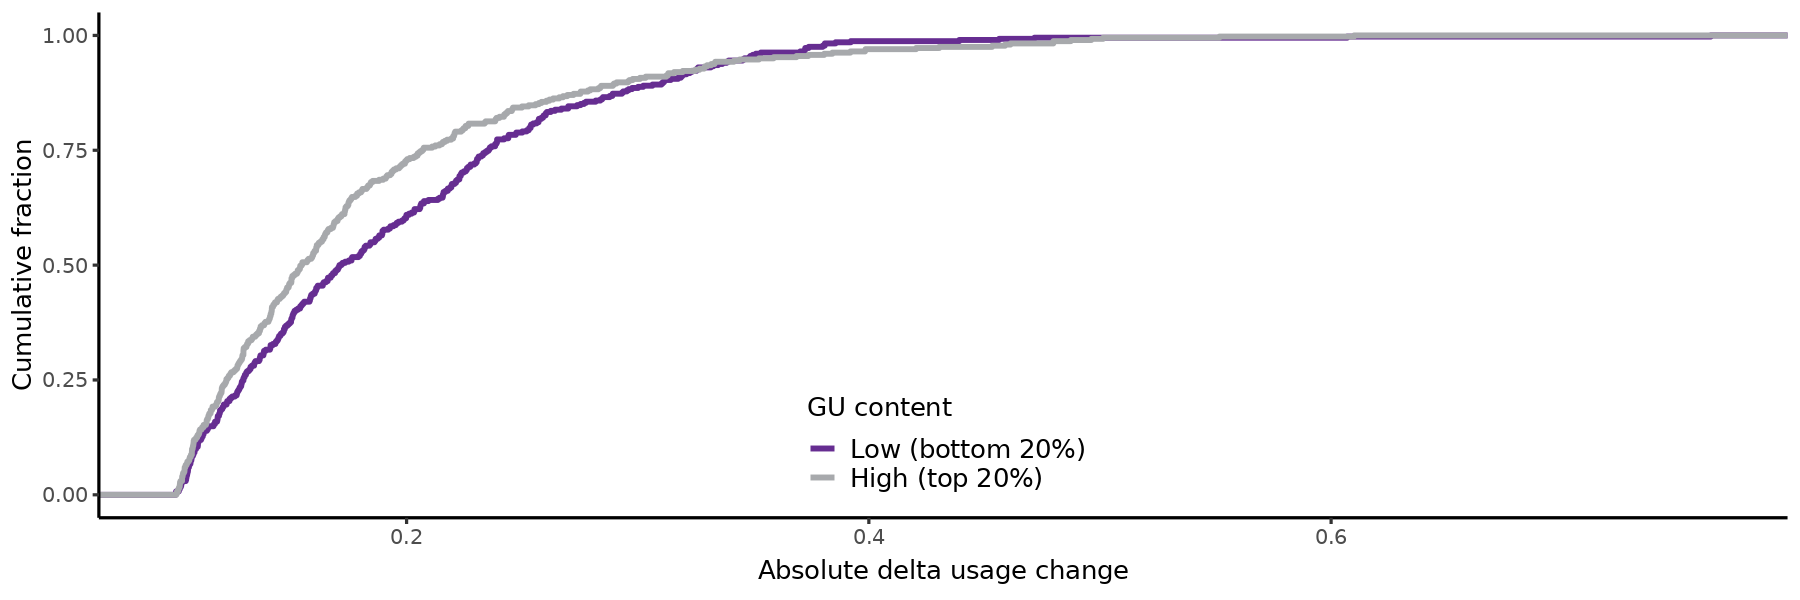

In [20]:
apa_ds_tdp43_gt_usage_change_plot

In [21]:
ggsave(apa_ds_tdp43_gt_usage_change_plot, 
       file = "fig_3c_apa_ds_tdp43_gt_usage_change_plot.pdf", 
       width = 1.75, height = 1.75, units = "in", dpi = 300)

## Fig. 3d

In [22]:
pas_score_f = fread("Fig_3d_aparent2_predicted_score_for_PAS_w_sig_changes.csv")

In [145]:
unique(pas_score_f$usage)

[1] "Decreased" "Increased"

### Test whether the distribution follows a normal distribution

In [146]:
shapiro.test(pas_score_f[usage == "Increased", log2(original_PAS_pred_narrow/(1-original_PAS_pred_narrow))])
shapiro.test(pas_score_f[usage == "Decreased", log2(original_PAS_pred_narrow/(1-original_PAS_pred_narrow))])


	Shapiro-Wilk normality test

data:  pas_score_f[usage == "Increased", log2(original_PAS_pred_narrow/(1 - original_PAS_pred_narrow))]
W = 0.96974, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  pas_score_f[usage == "Decreased", log2(original_PAS_pred_narrow/(1 - original_PAS_pred_narrow))]
W = 0.96295, p-value < 2.2e-16


In [147]:
wilcox.test(pas_score_f[usage == "Increased", log2(original_PAS_pred_narrow/(1-original_PAS_pred_narrow))], 
            pas_score_f[usage == "Decreased", log2(original_PAS_pred_narrow/(1-original_PAS_pred_narrow))])


	Wilcoxon rank sum test with continuity correction

data:  pas_score_f[usage == "Increased", log2(original_PAS_pred_narrow/(1 - original_PAS_pred_narrow))] and pas_score_f[usage == "Decreased", log2(original_PAS_pred_narrow/(1 - original_PAS_pred_narrow))]
W = 4283653, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [154]:
fig_3d = 
    ggplot(pas_score_f, 
           aes(log2(original_PAS_pred_narrow/(1-original_PAS_pred_narrow)), color = usage)) +
    stat_ecdf() + 
    scale_x_continuous(name = "PolyA site score (log2 odds ratio)") +
    scale_y_continuous(name = "Cumulative fraction") +
    theme_classic(base_size = 7) +
    scale_color_discrete(name = "Usage change\nupon TDP-43 KD") +
    theme(legend.position = c(0.3, 0.9), 
          legend.background = element_blank(),
          legend.title = element_text(size = 6), 
          legend.text = element_text(size = 6),
          legend.key.width = unit(0.1, "in"), 
          legend.key.size = unit(0.01, "in")
          )

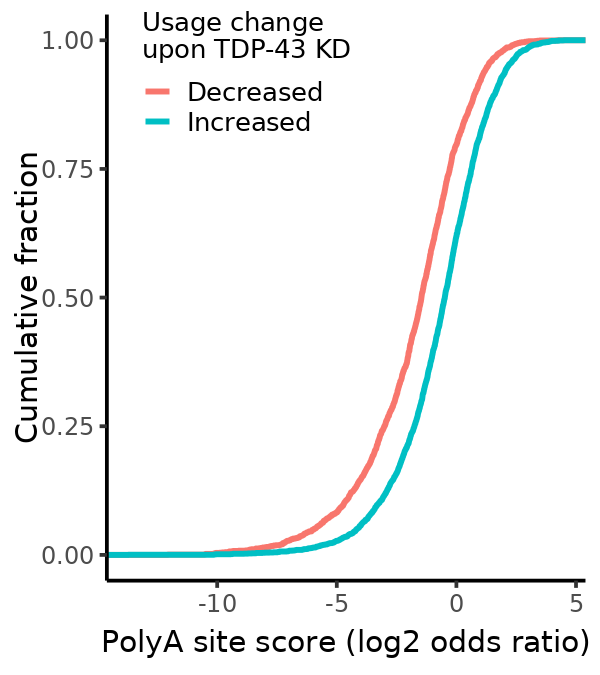

In [155]:
options(repr.plot.width=2, repr.plot.height=2.25, repr.plot.res = 300, repr.plot.units = "in")
fig_3d

In [17]:
ggsave(fig_3d, file = "fig_3d.pdf", width = 1.75, height = 1.75, units = "in", dpi = 300)

## Fig. 3e

In [25]:
apa_score_dist = fread("Fig_3e_aparent2_predicted_for_PAS_w_sig_changes_by_length.csv")

In [156]:
apa_score_dist$change = factor(apa_score_dist$change, levels = c("shorter", "longer"))

In [161]:
unique(apa_score_dist$usage)

[1] "Increased" "Decreased"

### Test whether the distribution follows a normal distribution

In [162]:
shapiro.test(apa_score_dist[change == "shorter"][usage == "Decreased", log2(pred_narrow/(1-pred_narrow))])
shapiro.test(apa_score_dist[change == "shorter"][usage == "Increased", log2(pred_narrow/(1-pred_narrow))])


	Shapiro-Wilk normality test

data:  apa_score_dist[change == "shorter"][usage == "Decreased", log2(pred_narrow/(1 - pred_narrow))]
W = 0.991, p-value = 0.02129



	Shapiro-Wilk normality test

data:  apa_score_dist[change == "shorter"][usage == "Increased", log2(pred_narrow/(1 - pred_narrow))]
W = 0.98931, p-value = 0.04645


In [163]:
shapiro.test(apa_score_dist[change == "longer"][usage == "Decreased", log2(pred_narrow/(1-pred_narrow))])
shapiro.test(apa_score_dist[change == "longer"][usage == "Increased", log2(pred_narrow/(1-pred_narrow))])


	Shapiro-Wilk normality test

data:  apa_score_dist[change == "longer"][usage == "Decreased", log2(pred_narrow/(1 - pred_narrow))]
W = 0.98483, p-value = 3.446e-15



	Shapiro-Wilk normality test

data:  apa_score_dist[change == "longer"][usage == "Increased", log2(pred_narrow/(1 - pred_narrow))]
W = 0.97166, p-value < 2.2e-16


In [164]:
wilcox.test(apa_score_dist[change == "shorter"][usage == "Decreased", log2(pred_narrow/(1-pred_narrow))], 
            apa_score_dist[change == "shorter"][usage == "Increased", log2(pred_narrow/(1-pred_narrow))])


	Wilcoxon rank sum test with continuity correction

data:  apa_score_dist[change == "shorter"][usage == "Decreased", log2(pred_narrow/(1 - pred_narrow))] and apa_score_dist[change == "shorter"][usage == "Increased", log2(pred_narrow/(1 - pred_narrow))]
W = 45877, p-value = 0.05562
alternative hypothesis: true location shift is not equal to 0


In [165]:
wilcox.test(apa_score_dist[change == "longer"][usage == "Decreased", log2(pred_narrow/(1-pred_narrow))], 
            apa_score_dist[change == "longer"][usage == "Increased", log2(pred_narrow/(1-pred_narrow))])


	Wilcoxon rank sum test with continuity correction

data:  apa_score_dist[change == "longer"][usage == "Decreased", log2(pred_narrow/(1 - pred_narrow))] and apa_score_dist[change == "longer"][usage == "Increased", log2(pred_narrow/(1 - pred_narrow))]
W = 1759775, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [176]:
fig_3e = 
    ggplot(apa_score_dist, aes(log2(pred_narrow/(1-pred_narrow)), color = usage)) +
    stat_ecdf() + 
    facet_wrap(~change, labeller = as_labeller(c("shorter" = "Shortening", "longer" = "Lengthening"))) +
    scale_x_continuous(name = "PolyA site score (log2 odds ratio)", limits = c(-10, 5)) +
    scale_y_continuous(name = "Cumulative fraction") +
    theme_bw(base_size = 7) +
    scale_color_manual(name = "PolyA site",
                       values = c("#3173BA", "#CE2728"),
                       labels = c("Proximal", "Distal")) +
    theme(legend.position = c(0.12, 0.85), 
          legend.title = element_text(size = 5), 
          legend.text = element_text(size = 5),
          legend.key.width = unit(0.1, "in"), 
          legend.key.size = unit(0.01, "in"),
          legend.background = element_blank(),
          strip.background = element_blank(), 
          panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.background = element_blank()
         )

Warning message:
“Removed 3 rows containing non-finite outside the scale range (`stat_ecdf()`).”


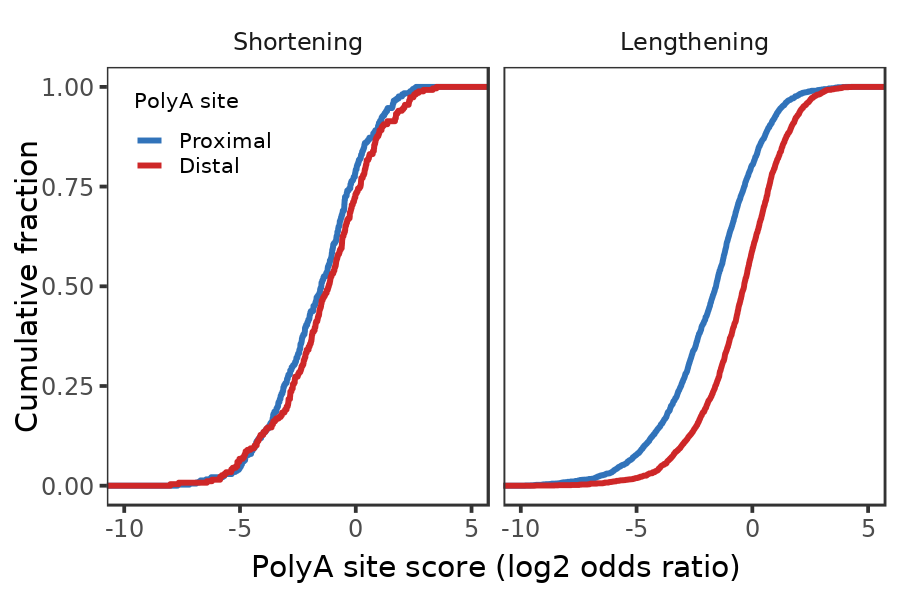

In [178]:
options(repr.plot.width=3, repr.plot.height=2, repr.plot.res = 300, repr.plot.units = "in")
fig_3e

In [179]:
ggsave(fig_3e, file = "fig_3e.pdf", width = 3, height = 2, units = "in", dpi = 300)

Warning message:
“Removed 3 rows containing non-finite outside the scale range (`stat_ecdf()`).”
